In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid", palette="husl", rc={
    'figure.figsize': (12, 6),
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

fig_num = 1

In [3]:
data = pd.read_csv("CupIT_Sber_data.csv", delimiter=";")
data.info()

data['service_date'] = pd.to_datetime(data['service_date'], errors='coerce')

data['service_amount_net'] = pd.to_numeric(
    data['service_amount_net'].str.replace(',', '.'), 
    errors='coerce'
)

data['is_refund'] = data['service_amount_net'].lt(0).astype(int)
data['service_amount_abs'] = data['service_amount_net'].abs()

data['service_year'] = data['service_date'].dt.year
data['service_month'] = data['service_date'].dt.to_period('M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


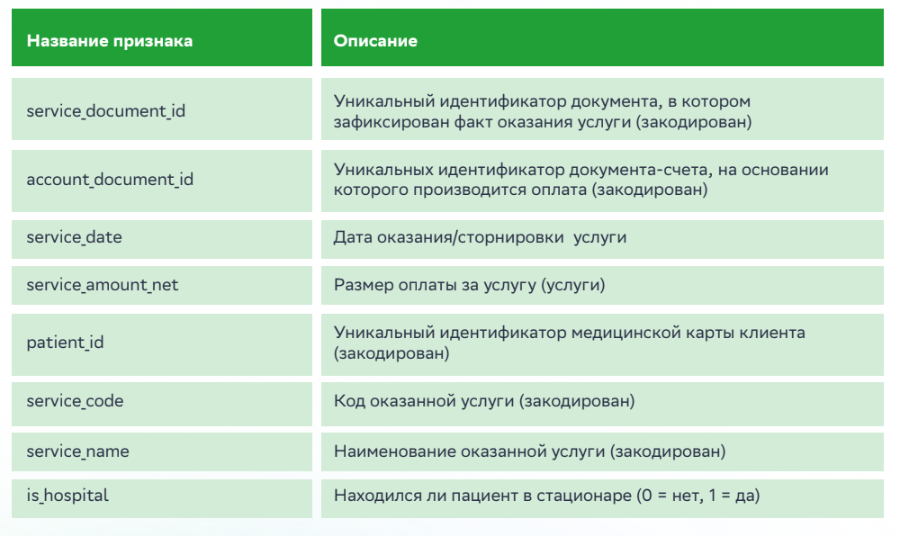

In [6]:
data.tail()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,is_refund,service_amount_abs,service_year,service_month
1091038,0xAF0854F4B12F33F7E708D054EA4C4E39,0x4BA2F4D793766AE703CC498131301D95,2023-12-21 10:57:00,1297.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0x2967289004C10B000F45A9ED3FD42988,0x28D5058F50AAF33F5CFAD39D1F33E733,0,0,1297.00,2023,2023-12
1091039,0x4B41C55DDC997B70CC37F7BC037BE0FF,0x980634735FC5C16158DC773FBF729F8F,2023-12-21 10:57:00,445.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0,0,445.00,2023,2023-12
1091040,0x65AC689ED66DADBE72A979C6C5971666,0x0FBD82C28836C2E8A5FC83939E32CA1D,2023-12-30 09:28:00,9726.00,0x96146D12EDF353CCADC6126BA97E180E,0x7EE918316FD3AEA062AF090BD4535E4C,0xC789986064B7B7656159FFB180390DB9,0,0,9726.00,2023,2023-12
1091041,0xD5DD4B29D93C2871463BC635FD574355,0xDB4C4A6CBD0B06EEC8DD55F1FF7EEEC3,2023-12-30 09:57:00,1764.00,0x96146D12EDF353CCADC6126BA97E180E,0xDBA2BFA1540877BB3F5969DDDFEBAECF,0x389978FE61E4BDD814604F07FD9E7823,0,0,1764.00,2023,2023-12
1091042,0xB7BD55A988EBA0E946C56A8DCA2BA423,0xF611B2F346D82DBC26676192407A6CE2,2023-12-30 12:53:00,13212.37,0x96146D12EDF353CCADC6126BA97E180E,0xFC4F19325D9746B630C23610505567C7,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0,0,13212.37,2023,2023-12


## Short EDA

In [4]:
print("ЧИСЛО УНИКАЛЬНЫХ ЗНАЧЕНИЙ КАЖДОГО ПРИЗНАКА:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

ЧИСЛО УНИКАЛЬНЫХ ЗНАЧЕНИЙ КАЖДОГО ПРИЗНАКА:
service_document_id: 1084033
account_document_id: 1091043
service_date: 333415
service_amount_net: 21308
patient_id: 29701
service_code: 5232
service_name: 3027
is_hospital: 2
is_refund: 2
service_amount_abs: 20221
service_year: 2
service_month: 24


In [5]:
data['service_amount_net'] 

0           1925.00
1           4800.00
2           1710.00
3           2040.00
4           2200.00
             ...   
1091038     1297.00
1091039      445.00
1091040     9726.00
1091041     1764.00
1091042    13212.37
Name: service_amount_net, Length: 1091043, dtype: float64

In [7]:
data['service_date'] = pd.to_datetime(data['service_date'], errors='coerce')

data['is_refund'] = data['service_amount_net'].lt(0).astype(int)
data['service_amount_abs'] = data['service_amount_net'].abs()

data['service_year'] = data['service_date'].dt.year
data['service_month'] = data['service_date'].dt.to_period('M')

## Temporal Analysis (Updated)

C:\Users\Mi\AppData\Local\Temp\ipykernel_23144\1682436.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data=data.resample('M', on='service_date').count().reset_index(),
C:\Users\Mi\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mi\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


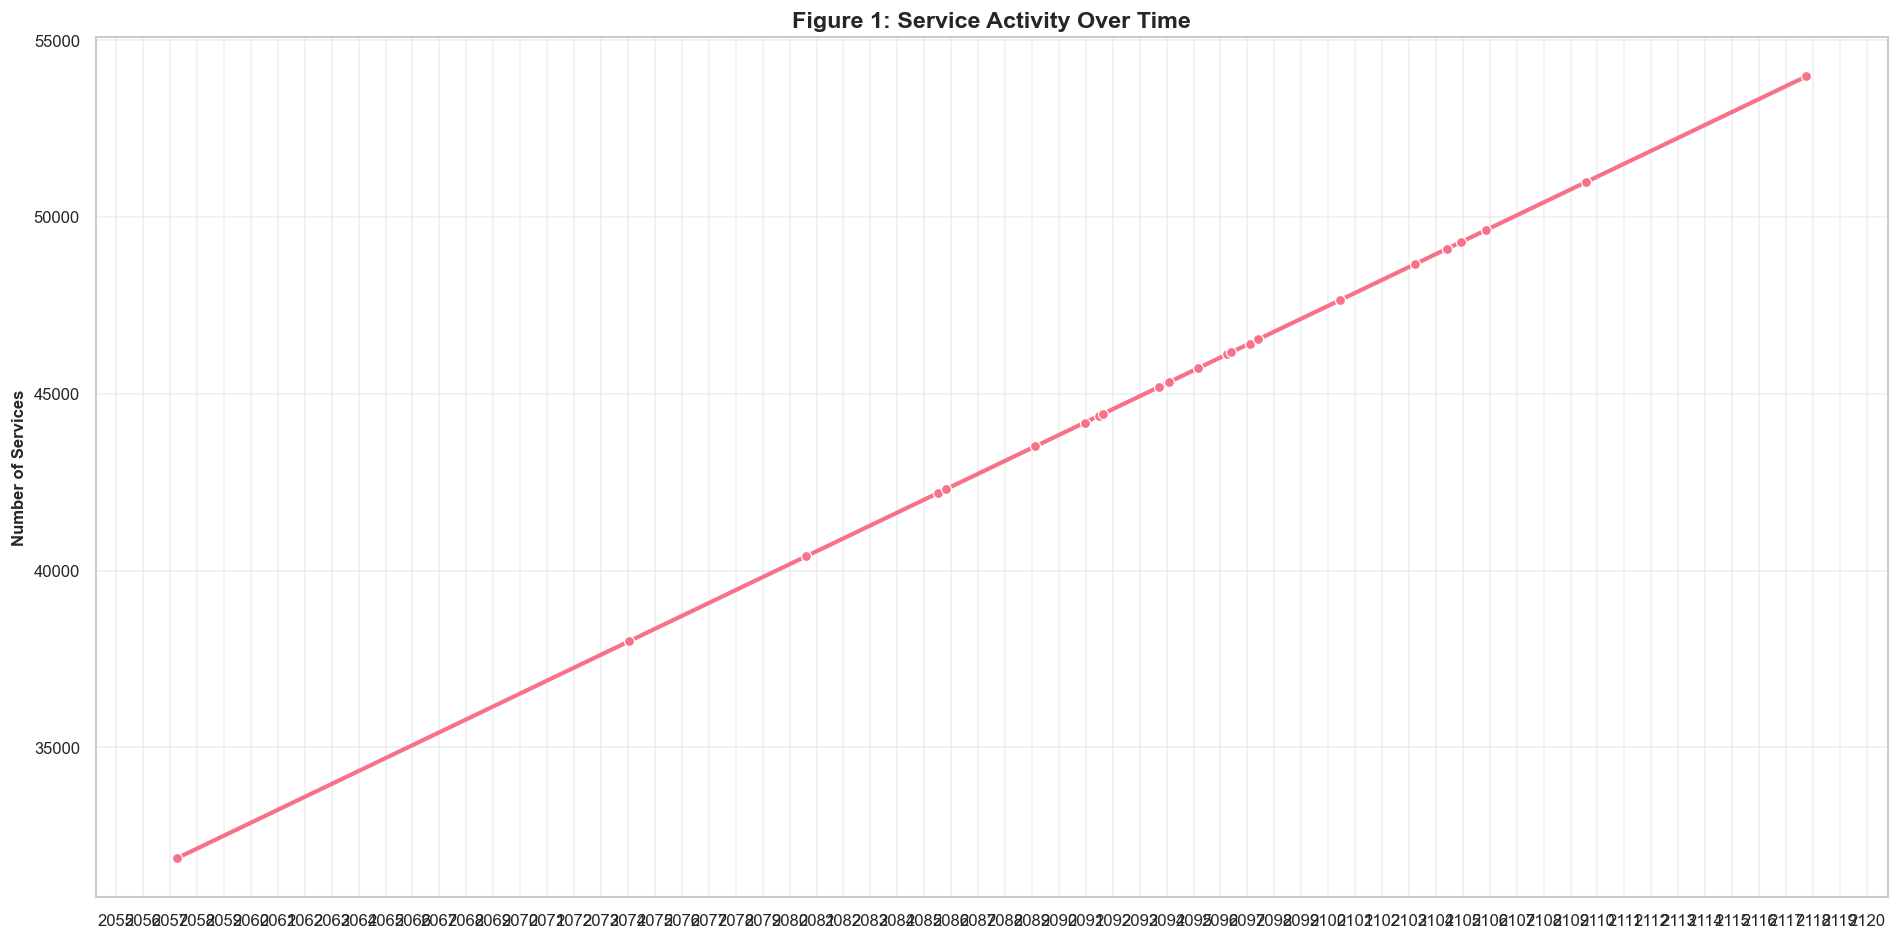

In [8]:
plt.figure(figsize=(16, 8), dpi=120)
ax = sns.lineplot(
    x='service_month',
    y='service_document_id',
    data=data.resample('M', on='service_date').count().reset_index(),
    marker='o',
    linewidth=2.5
)
plt.title(f'Figure {fig_num}: Service Activity Over Time', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Number of Services', fontsize=10)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
fig_num += 1

## Financial Analysis

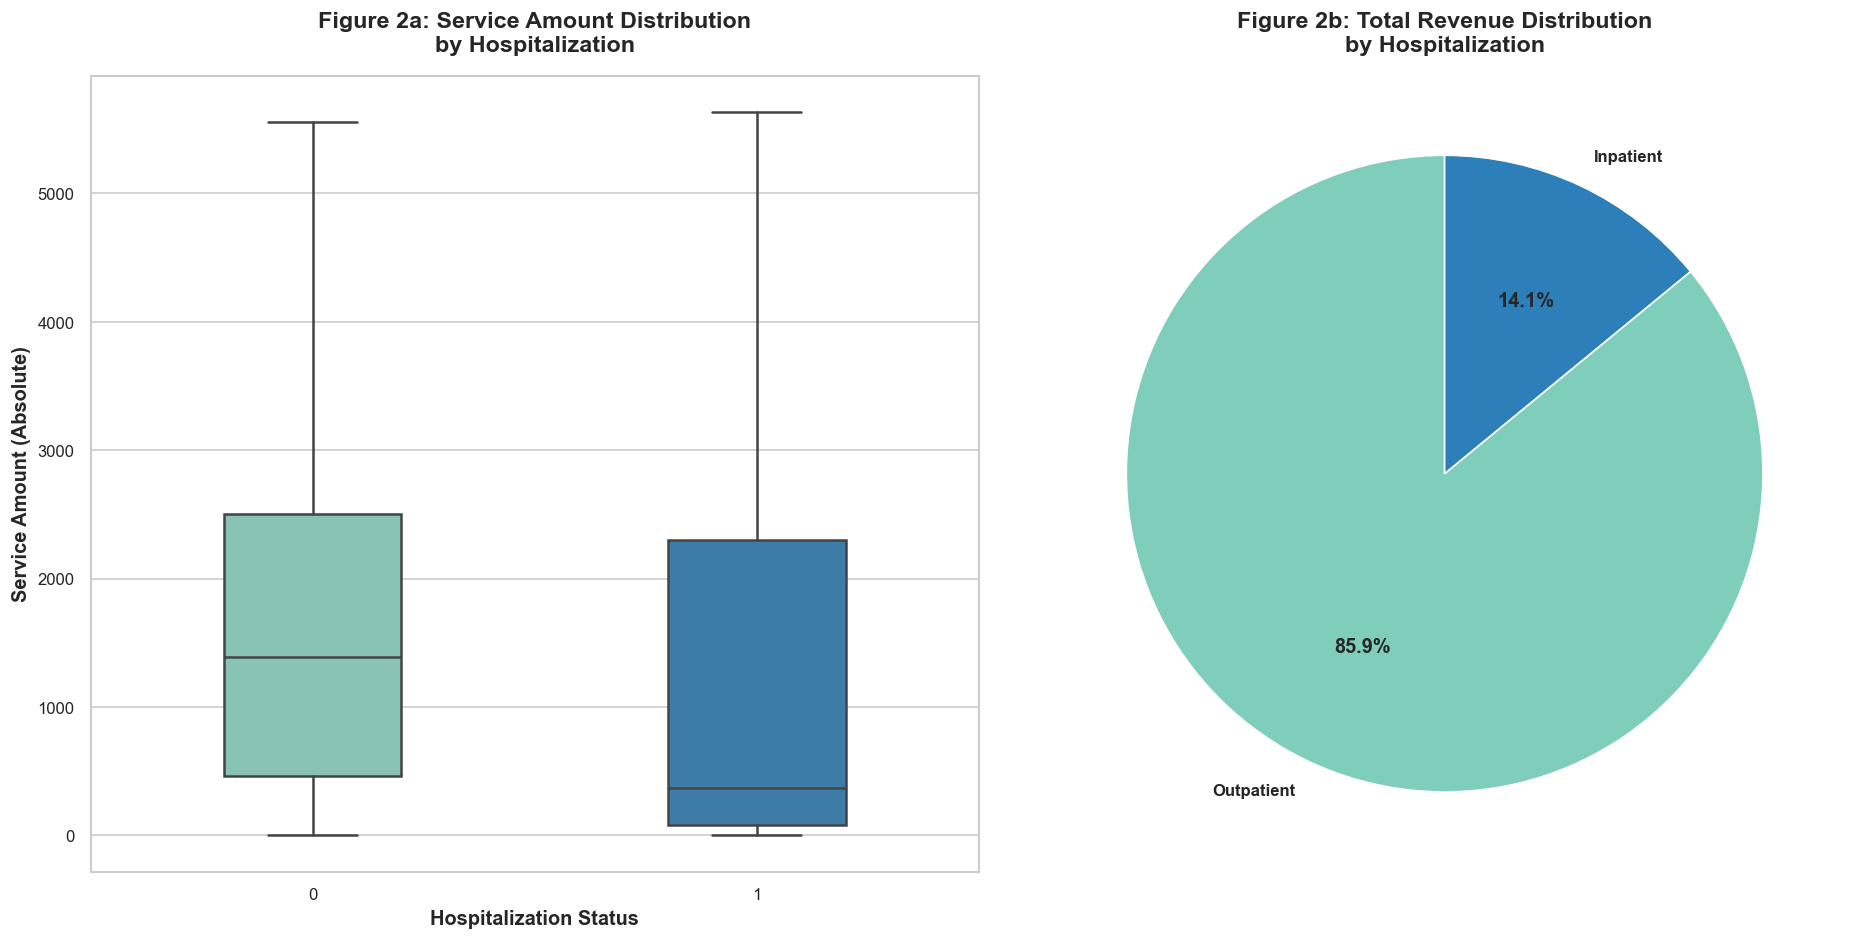

In [9]:
plt.figure(figsize=(16, 8), dpi=120)
plt.subplot(1, 2, 1)
sns.boxplot(
    x='is_hospital',
    y='service_amount_abs',
    data=data,
    showfliers=False,
    width=0.4,
    palette=['#7fcdbb', '#2c7fb8']
)
plt.title(f'Figure {fig_num}a: Service Amount Distribution\nby Hospitalization', pad=15)
plt.xlabel('Hospitalization Status')
plt.ylabel('Service Amount (Absolute)')

plt.subplot(1, 2, 2)
hospital_amounts = data.groupby('is_hospital')['service_amount_abs'].sum()
plt.pie(
    hospital_amounts,
    labels=['Outpatient', 'Inpatient'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#7fcdbb', '#2c7fb8'],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'weight': 'bold'}
)
plt.title(f'Figure {fig_num}b: Total Revenue Distribution\nby Hospitalization', pad=15)
plt.tight_layout()
plt.show()
fig_num += 1

## Aggregations

C:\Users\Mi\AppData\Local\Temp\ipykernel_23144\2731551420.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg = ts_data.resample('M').agg(
C:\Users\Mi\AppData\Local\Temp\ipykernel_23144\2731551420.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_agg = monthly_agg.resample('Y').sum().reset_index()
C:\Users\Mi\AppData\Local\Temp\ipykernel_23144\2731551420.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hospital_growth = data.groupby(['is_hospital', pd.Grouper(key='service_date', freq='M')])['service_amount_net'] \
C:\Users\Mi\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Use

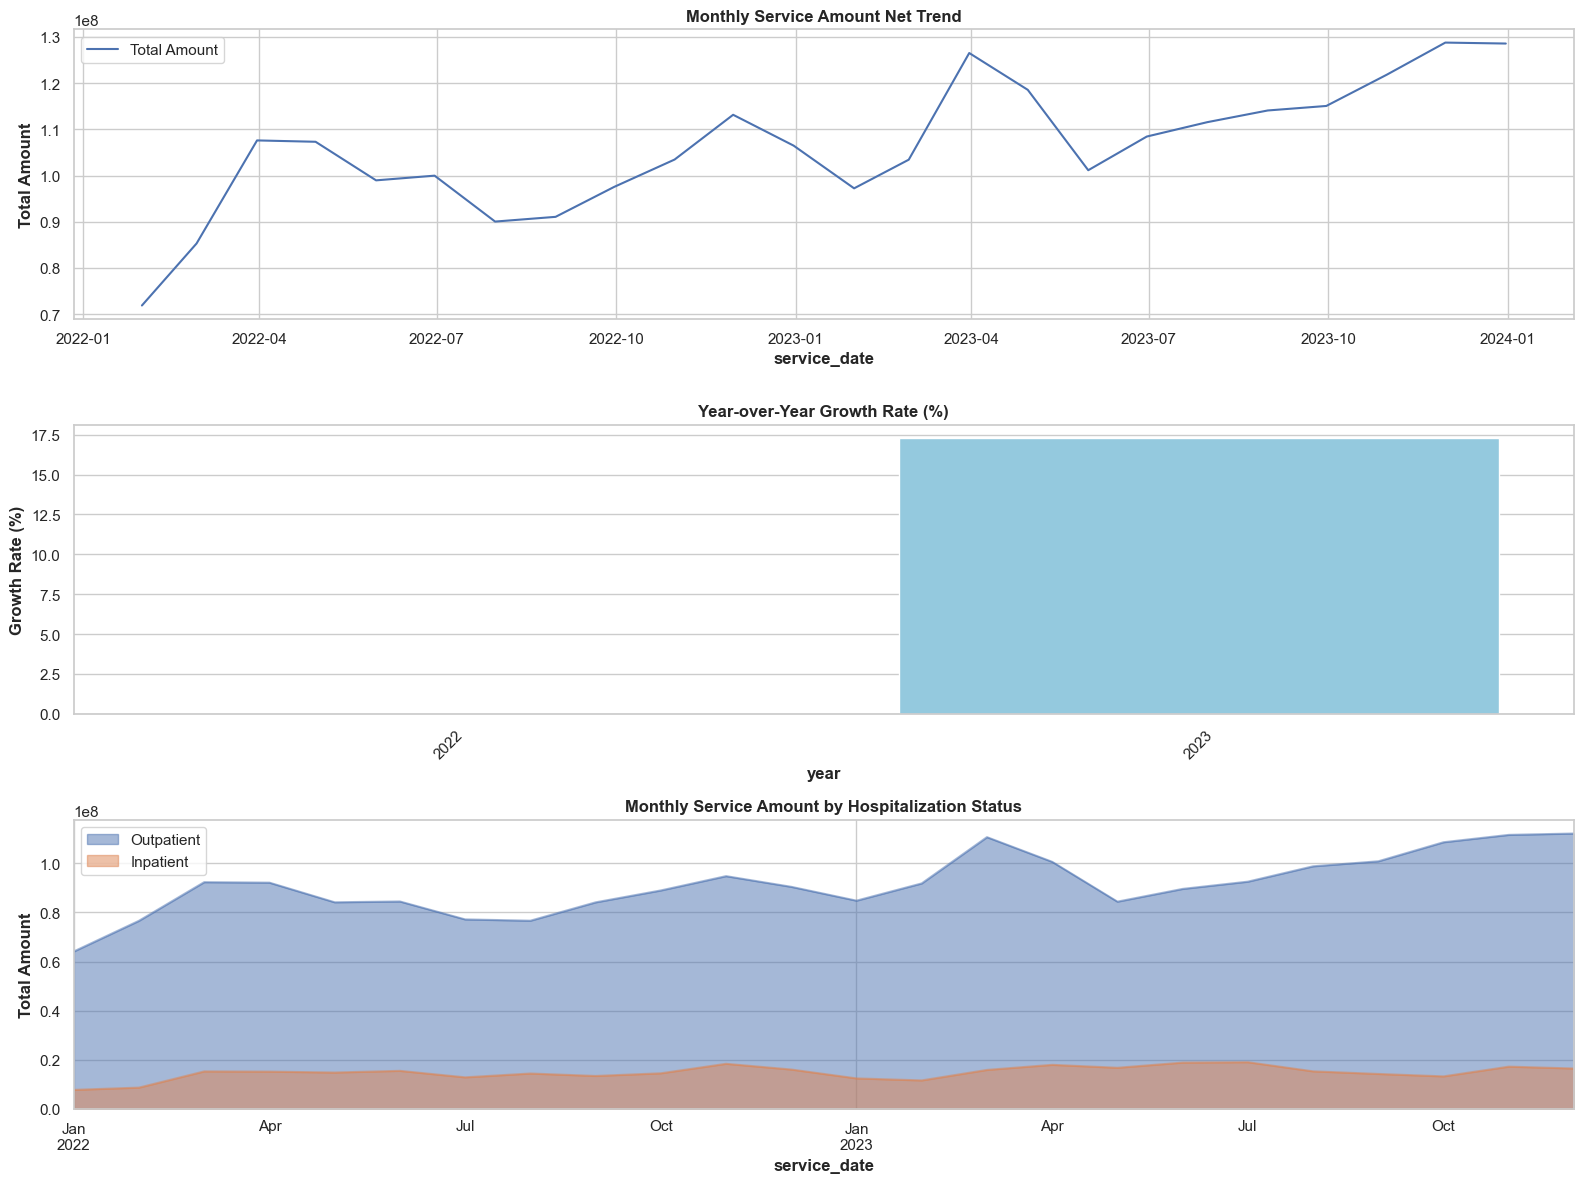

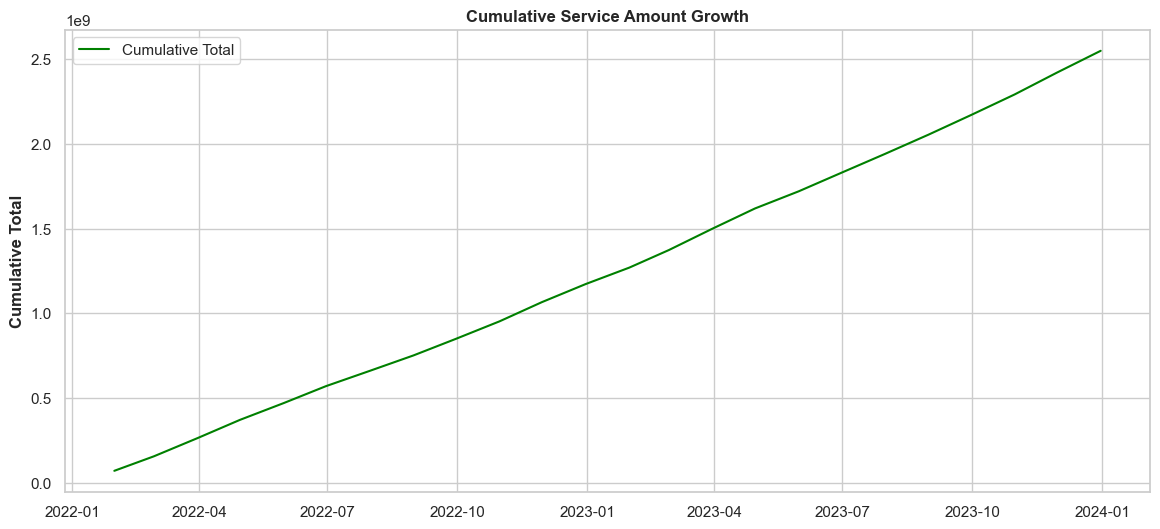

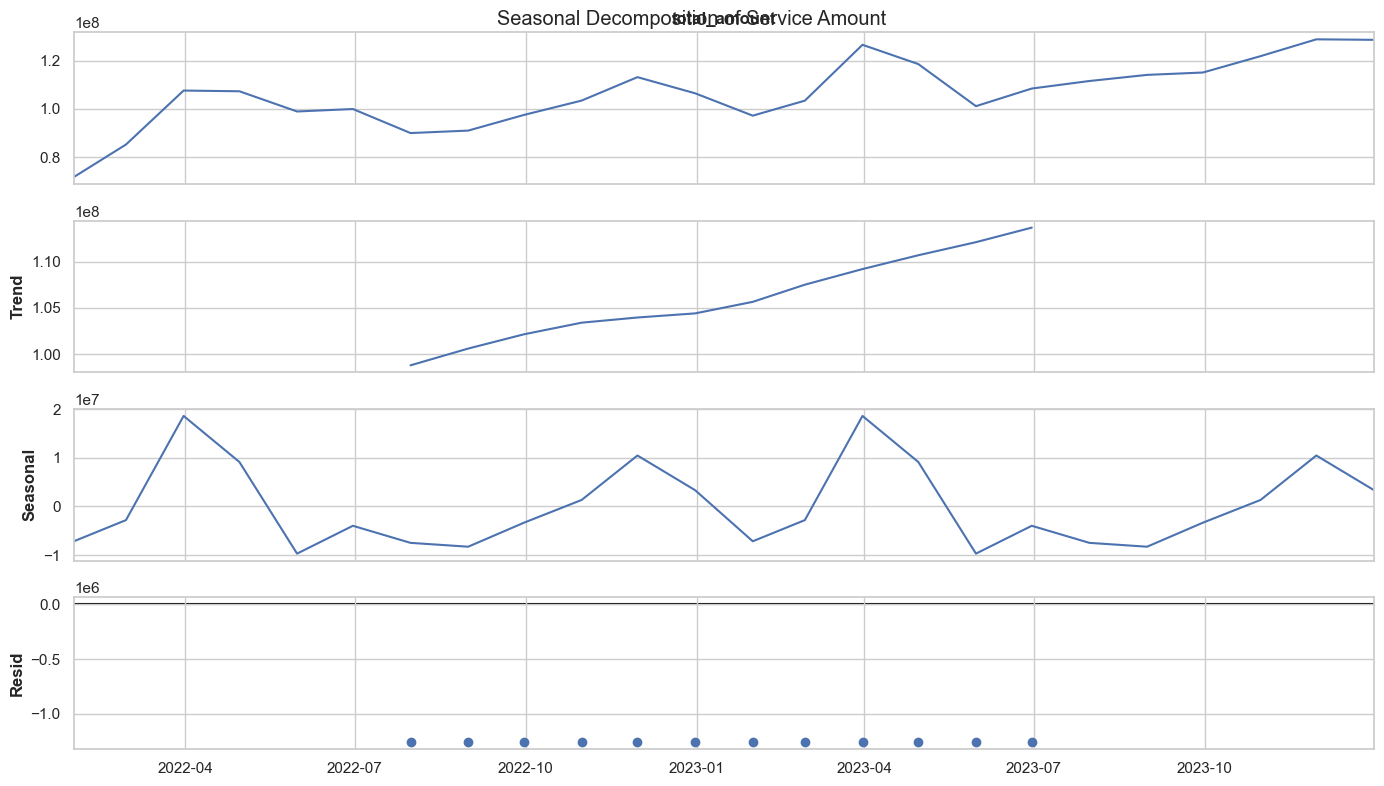

C:\Users\Mi\AppData\Local\Temp\ipykernel_23144\2731551420.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative_ts = ts_data[ts_data['service_amount_net'] < 0].resample('M').sum()
C:\Users\Mi\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mi\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


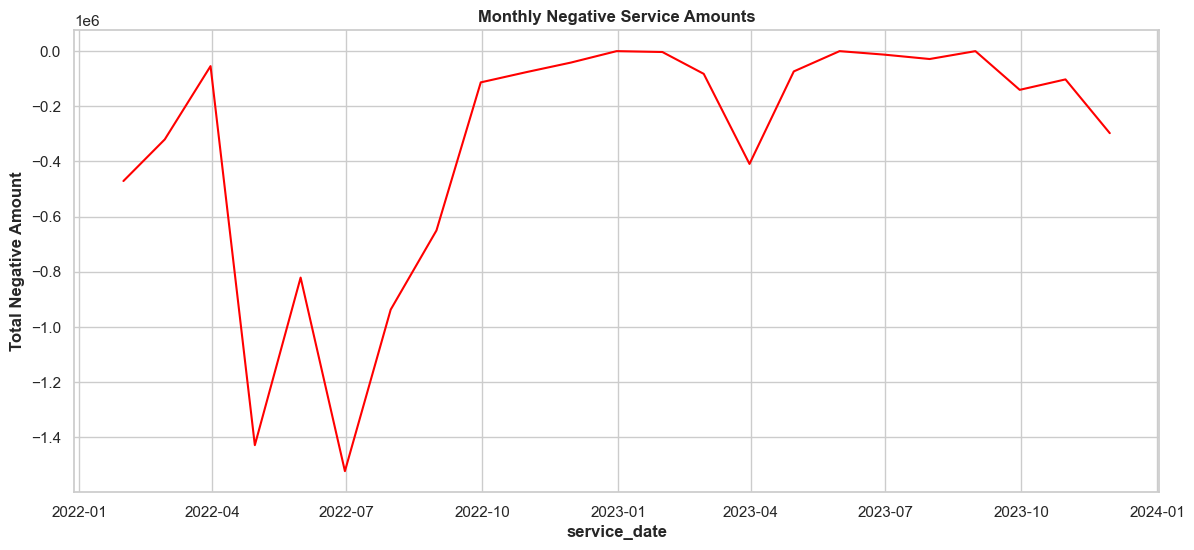

Growth Analysis Summary:
Total Growth: 56,729,654.73
Average Monthly Growth: 106,161,297.39
Compound Monthly Growth Rate: 33.77%

Yearly Growth Rates:
   year  total_amount  yoy_growth
0  2022  1.172652e+09         NaN
1  2023  1.375219e+09       17.27


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

# Set visualization style
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 14, 8
register_matplotlib_converters()

# Ensure datetime conversion
data['service_date'] = pd.to_datetime(data['service_date'])
data['service_amount_net'] = pd.to_numeric(data['service_amount_net'], errors='coerce')

# Create time series DataFrame
ts_data = data.set_index('service_date')[['service_amount_net']].sort_index()

# 1. Monthly Aggregation Analysis
monthly_agg = ts_data.resample('M').agg(
    total_amount=('service_amount_net', 'sum'),
    avg_amount=('service_amount_net', 'mean'),
    transaction_count=('service_amount_net', 'count')
)

# 2. Yearly Growth Analysis
yearly_agg = monthly_agg.resample('Y').sum().reset_index()
yearly_agg['year'] = yearly_agg['service_date'].dt.year
yearly_agg['yoy_growth'] = yearly_agg['total_amount'].pct_change() * 100

# 3. Hospitalization Impact on Growth
hospital_growth = data.groupby(['is_hospital', pd.Grouper(key='service_date', freq='M')])['service_amount_net'] \
    .sum().unstack(level=0)
hospital_growth.columns = ['Outpatient', 'Inpatient']

# 4. Cumulative Growth Analysis
cumulative_growth = monthly_agg['total_amount'].cumsum()

# 5. Seasonal Decomposition
decomposition = seasonal_decompose(monthly_agg['total_amount'], model='additive', period=12)

# Visualizations
plt.figure(figsize=(16, 12))

# 1. Monthly Total Amount Trend
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_agg, x=monthly_agg.index, y='total_amount', label='Total Amount')
plt.title('Monthly Service Amount Net Trend')
plt.ylabel('Total Amount')
plt.grid(True)

# 2. Year-over-Year Growth
plt.subplot(3, 1, 2)
sns.barplot(data=yearly_agg, x='year', y='yoy_growth', color='skyblue')
plt.title('Year-over-Year Growth Rate (%)')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)

# 3. Hospitalization Contribution
plt.subplot(3, 1, 3)
hospital_growth.plot(kind='area', stacked=False, ax=plt.gca())
plt.title('Monthly Service Amount by Hospitalization Status')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

# 4. Cumulative Growth Plot
plt.figure(figsize=(14, 6))
plt.plot(cumulative_growth.index, cumulative_growth.values, label='Cumulative Total', color='green')
plt.title('Cumulative Service Amount Growth')
plt.ylabel('Cumulative Total')
plt.legend()
plt.grid(True)
plt.show()

# 5. Seasonal Decomposition Plot
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Service Amount')
plt.show()

# 6. Distribution of Negative Values Over Time
negative_ts = ts_data[ts_data['service_amount_net'] < 0].resample('M').sum()
plt.figure(figsize=(14, 6))
sns.lineplot(data=negative_ts, x=negative_ts.index, y='service_amount_net', color='red')
plt.title('Monthly Negative Service Amounts')
plt.ylabel('Total Negative Amount')
plt.grid(True)
plt.show()

# Key Metrics
print("Growth Analysis Summary:")
print(f"Total Growth: {monthly_agg['total_amount'].iloc[-1] - monthly_agg['total_amount'].iloc[0]:,.2f}")
print(f"Average Monthly Growth: {monthly_agg['total_amount'].mean():,.2f}")
print(f"Compound Monthly Growth Rate: {(monthly_agg['total_amount'].iloc[-1]/monthly_agg['total_amount'].iloc[0])**(1/(len(monthly_agg)/12)) - 1:.2%}")

# YoY Growth Table
print("\nYearly Growth Rates:")
print(yearly_agg[['year', 'total_amount', 'yoy_growth']].round(2))